**Laboratorio 1**

Karin Elizabeth López Padilla 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

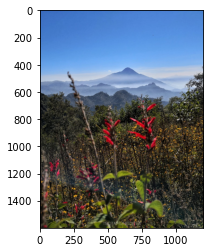

In [2]:
img = cv2.imread('Tajumulco.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

**Problema 1:**
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:


In [3]:
def colorimagen(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]    
    img_color = ""
    lienzo = np.zeros((alto,ancho, 3)) 
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                lienzo[i,j] = [blue,0,0]
                img_color = "Blue"
            elif(color == 2):
                lienzo[i,j] = [0,green,0]
                img_color = "Green"
            elif(color == 3):
                lienzo[i,j] = [0,0,red]
                img_color = "Red"
            elif(color == 10):
                lienzo[i,j] = [0,green,red]
                img_color = "Red_green"
            elif(color == 20):
                lienzo[i,j] = [blue,green,0]
                img_color = "Green_Blue"
            elif(color == 30):
                lienzo[i,j] = [blue,0,red]
                img_color = "Blue_Red"
                
    Guardar(lienzo,img_color) 

In [4]:
def Guardar(lienzo,color):
    cv2.imwrite("img"+color+".jpeg", lienzo)
    monocromatico = cv2.imread("img"+color+".jpeg")
    monocromatico = cv2.cvtColor(monocromatico, cv2.COLOR_BGR2RGB)
    plt.imshow(monocromatico)

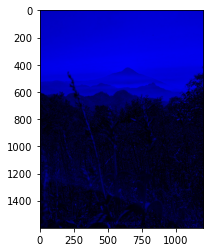

In [5]:
colorimagen(img,1)



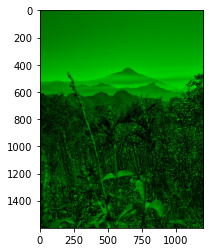

In [6]:
colorimagen(img,2)

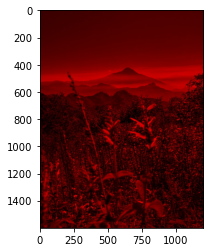

In [7]:
colorimagen(img,3)

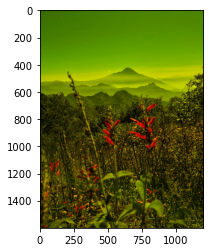

In [8]:
colorimagen(img,10)

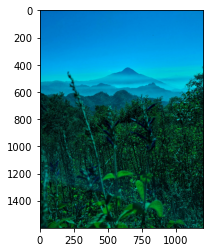

In [9]:
colorimagen(img,20)

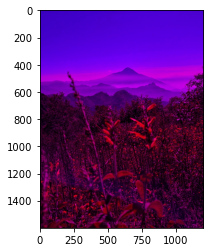

In [10]:
colorimagen(img,30)

**Problema 2:**
En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1,
imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una
función que dadas las 3 imágenes se construya la imagen original a color.

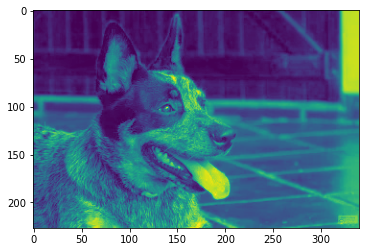

In [28]:
gray_azul = cv2.imread('perro_salida_gray_azul.jpg')
img_gray_Azul = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray_Azul)



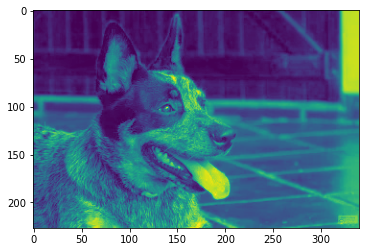

In [29]:
gray_rojo = cv2.imread('perro_salida_gray_rojo.jpg')
img_gray_rojo = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray_rojo)


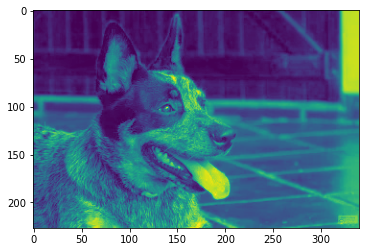

In [32]:
gray_verde = cv2.imread('perro_salida_gray_verde.jpg')
img_gray_verde = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray_verde)

**Problema 3:**
Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.


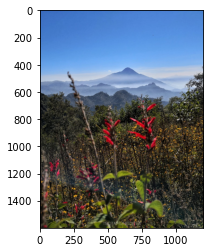

In [11]:
plt.imshow(img)
alto = img.shape[0]
ancho = img.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [46]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = img[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
        gray_ponderado[i,j] = np.array(int(0.30*pixel[2] + 0.59*pixel[1] + 0.11*pixel[0]))
        

In [14]:
def img_gray(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imggray1 = cv2.imread(strImg)
    imggray1 = cv2.cvtColor(imggray1, cv2.COLOR_BGR2RGB)
    plt.imshow(imggray1)

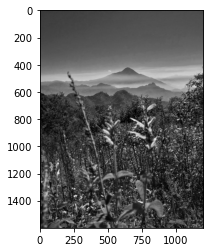

In [16]:
img_gray("rojo.jpg",gray_red)


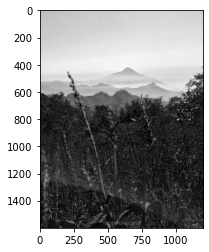

In [17]:
img_gray("azul.jpg",gray_blue)


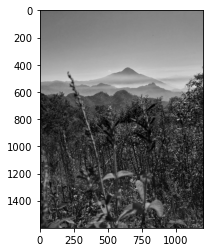

In [18]:
img_gray("verde.jpg",gray_green)

**Problema 4:**
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.


In [141]:
def grafic(img):
    im=img
    fig, axs = plt.subplots(1,2, figsize=(35, 10))
    color = ('b', 'g', 'r') 
    
    for i, col in enumerate(color): 
        histr = cv2.calcHist([im],[i], None,[256],[0, 256])
        axs[1].set_title('Histograma',fontsize=20)
        axs[1].plot(histr, color = col)
        axs[1].axis(xmin=0,xmax=256)
    axs[0].set_title('Imagen',fontsize=20)
    axs[0].imshow(im, origin='upper')
    plt.show()
    return(None)

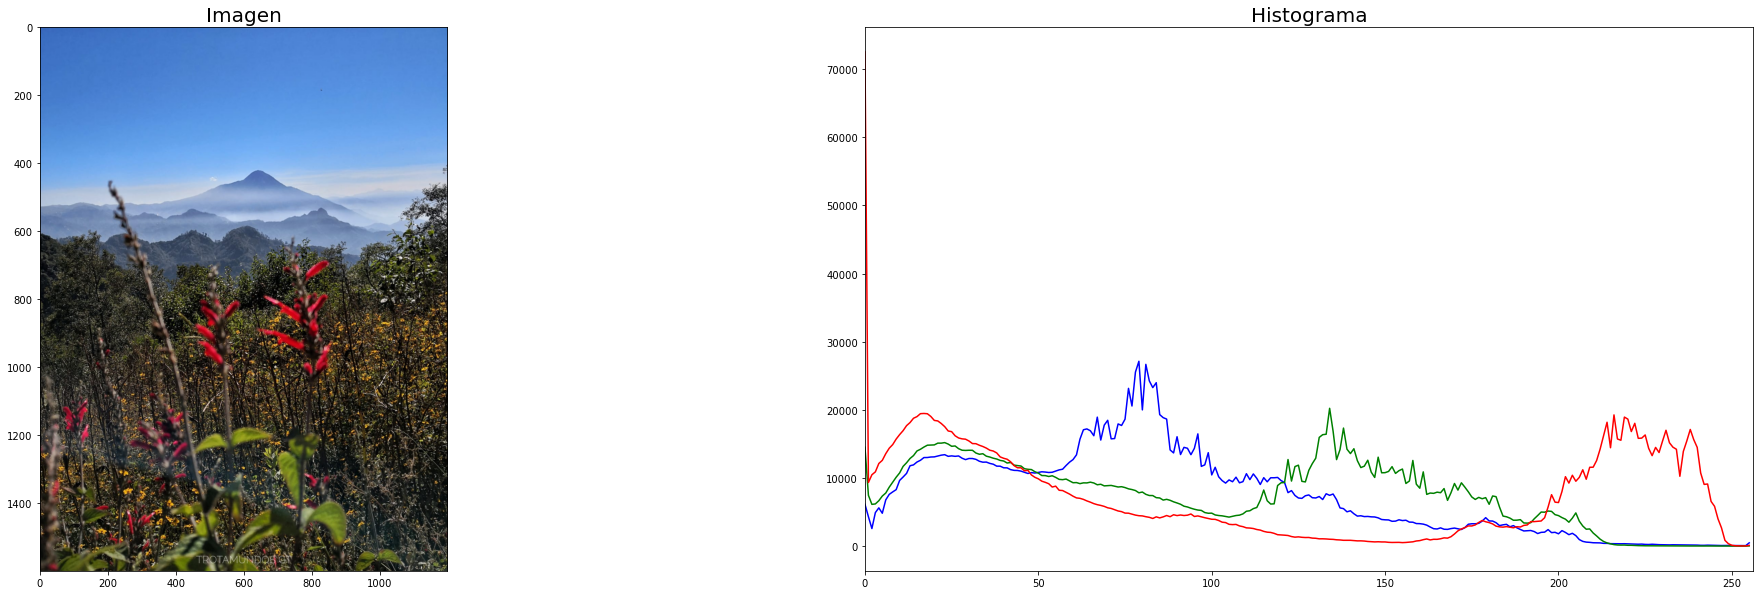

In [142]:
grafic(img)

**Problema 5:**
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).


El ojo percibe distintas intesidades de luz en función del color que se observe, esto es debido a la respuesta del ojo al espectro visible, por esa razón el cálculo del equivalente blanco y negro (escala de grises o luminancia) se puede realizar  con una media ponderada de las distintas componentes de color de cada pixel.

La ecuación de la luminancia nos muestra es la expresión matemática de ese fenómeno y los factores de ponderación de cada componente de color nos indican la sensibilidad del ojo humano a las frecuencias del espectro cercanas al rojo, verde y azul.

Y = R*0.3+G*0.59+B*0.11

gray_ponderado[i,j] = int(0.3*pixel[2] + 0.59*pixel[1] + 0.11*pixel[0])


In [ ]:
img_gray("ponderado.jpg",gray_ponderado)

**Problema 6:**
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajó los demás ejercicios.

### HSV
El modelo HSV (del inglés Hue, Saturation, Value – Matiz, Saturación, Valor), también llamado HSB (Hue, Saturation, Brightness – Matiz, Saturación, Brillo), define un modelo de color en términos de sus componentes.

Uno de estos modelos de color perceptivos es HSL, que es un acrónimo de tono, saturación y luminosidad. Originalmente, Joblove y Greenberg lo introdujeron como "tono/croma/intensidad"  Describen el espacio de color como un sólido biconal en el que el eje vertical representa todos los tonos de gris entre 0 (negro) y 1 (blanco). Todos los colores completamente saturados se encuentran en el círculo exterior de la base común de ambos conos en 0.5, que permite definir el matiz como un ángulo. El tercer parámetro, la saturación, corresponde al radio del círculo alrededor del eje vertical en la posición de la luminosidad actual.